In [3]:
import sys
print(sys.executable)


C:\Users\grego\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para gráficos más bonitos
sns.set(style="whitegrid")

df = pd.read_csv("../Data/f1_clean_Dataset.csv") 
df['date'] = pd.to_datetime(df['date'])    

df.head()

Matplotlib is building the font cache; this may take a moment.


,resultId,raceId,driverId,constructorId,number_x,grid,position,points,laps,time,...,dob,nationality,url,year,race_name,round,circuitId,date,team_name,driver_fullname
0,1,18,1,1,22,1,1,10.0,58,1:34:50.616,...,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,Australian Grand Prix,1,1,2008-03-16,McLaren,Lewis Hamilton
1,2,18,2,2,3,5,2,8.0,58,+5.478,...,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,Australian Grand Prix,1,1,2008-03-16,BMW Sauber,Nick Heidfeld
2,3,18,3,3,7,7,3,6.0,58,+8.163,...,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,Australian Grand Prix,1,1,2008-03-16,Williams,Nico Rosberg
3,4,18,4,4,5,11,4,5.0,58,+17.181,...,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,Australian Grand Prix,1,1,2008-03-16,Renault,Fernando Alonso
4,5,18,5,1,23,3,5,4.0,58,+18.014,...,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,Australian Grand Prix,1,1,2008-03-16,McLaren,Heikki Kovalainen


In [ ]:
cols_to_numeric = ['position', 'rank', 'fastestLapSpeed']

for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')  


Promedio de posición final por piloto

In [8]:
avg_position = df.groupby('driver_fullname')['position'].mean().sort_values()
print(avg_position)


driver_fullname
Dorino Serafini     2.000000
George Amick        2.000000
Alberto Ascari      2.181818
Juan Fangio         2.250000
Nino Farina         2.814815
                      ...   
Tony Trimmer             NaN
Vic Wilson               NaN
Vincenzo Sospiri         NaN
Volker Weidler           NaN
Willi Heeks              NaN
Name: position, Length: 861, dtype: float64


Puntos totales por temporada

In [12]:
# Agrupar y sumar puntos por temporada y piloto
points_per_season = df.groupby(['year', 'driver_fullname'])['points'].sum()

# Filtrar solo los que tienen puntos > 0
points_per_season = points_per_season[points_per_season > 0]

print(points_per_season)


year  driver_fullname         
1950  Alberto Ascari               11.00
      Bill Holland                  6.00
      Cecil Green                   3.00
      Dorino Serafini               3.00
      Eugène Chaboud                1.00
      Felice Bonetto                2.00
      Johnnie Parsons               9.00
      Joie Chitwood                 1.00
      Juan Fangio                  27.00
      Louis Chiron                  4.00
      Louis Rosier                 13.00
      Luigi Fagioli                28.00
      Mauri Rose                    4.00
      Nino Farina                  30.00
      Peter Whitehead               4.00
      Philippe Étancelin            3.00
      Prince Bira                   5.00
      Raymond Sommer                3.00
      Reg Parnell                   4.00
      Robert Manzon                 3.00
      Tony Bettenhausen             1.00
      Yves Cabantous                3.00
1951  Alberto Ascari               28.00
      Andy Linden         

Consistencia (desviación estándar de posiciones)

In [13]:
consistency = df.groupby('driver_fullname')['position'].std().sort_values()
print(consistency)


driver_fullname
Brian Naylor                      0.000000
George Connor                     0.000000
Bernd Schneider                   0.577350
Toni Branca                       0.707107
Roger Penske                      0.707107
Eddie Keizan                      0.707107
Peter de Klerk                    0.707107
Élie Bayol                        0.707107
Paul Hawkins                      0.707107
Duke Dinsmore                     0.707107
Cliff Griffith                    0.707107
François Migault                  0.957427
Emanuele Naspetti                 1.000000
Pierre Levegh                     1.000000
Felice Bonetto                    1.000000
Moisés Solana                     1.000000
Guy Ligier                        1.032796
Roberto Mieres                    1.125992
Franck Montagny                   1.154701
David Hobbs                       1.169045
Ian Scheckter                     1.290994
Michel Leclère                    1.341641
François Hesnault                 1.34

Ranking de mejores pilotos y equipos

In [15]:
# Ranking pilotos por puntos totales
total_points = df.groupby('driver_fullname')['points'].sum().sort_values(ascending=False)
print(total_points.head(10))

# Ranking equipos por puntos totales
team_points = df.groupby('team_name')['points'].sum().sort_values(ascending=False)
print(team_points.head(10))


driver_fullname
Lewis Hamilton        4820.5
Sebastian Vettel      3098.0
Max Verstappen        2912.5
Fernando Alonso       2329.0
Kimi Räikkönen        1873.0
Valtteri Bottas       1788.0
Nico Rosberg          1594.5
Sergio Pérez          1585.0
Michael Schumacher    1566.0
Charles Leclerc       1363.0
Name: points, dtype: float64
team_name
Ferrari        11091.27
Mercedes        7730.64
Red Bull        7673.00
McLaren         7022.50
Williams        3641.00
Renault         1777.00
Force India     1098.00
Team Lotus       995.00
Benetton         861.50
Tyrrell          711.00
Name: points, dtype: float64


Visualizaciones

C:\Users\grego\AppData\Local\Temp\ipykernel_19900\2456903310.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_points.head(10).index, y=total_points.head(10).values, palette='viridis')


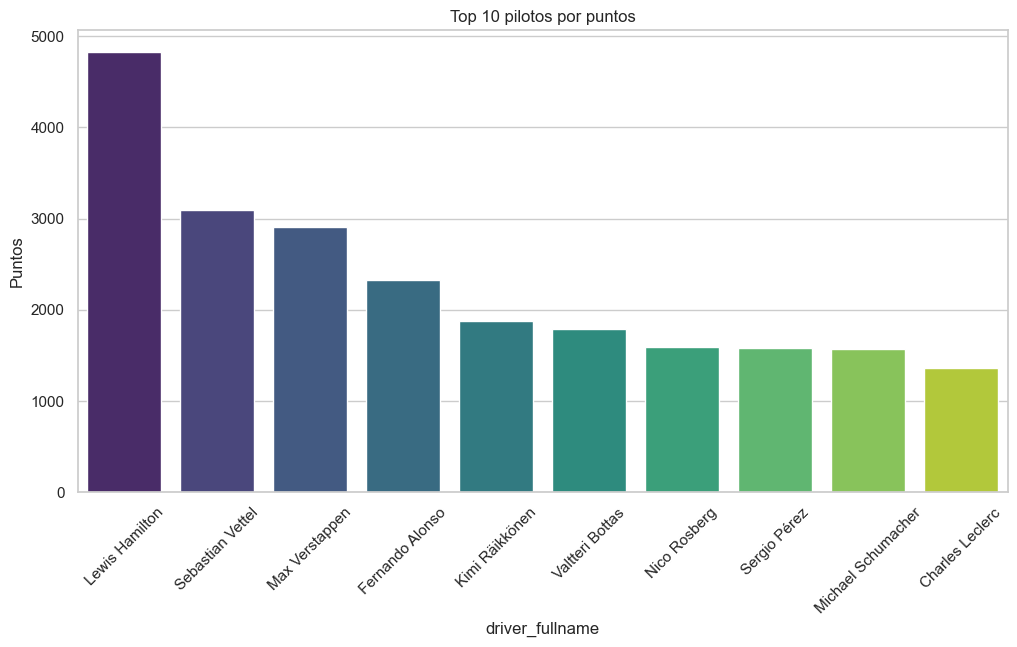

C:\Users\grego\AppData\Local\Temp\ipykernel_19900\2456903310.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=consistency.head(10).index, y=consistency.head(10).values, palette='magma')


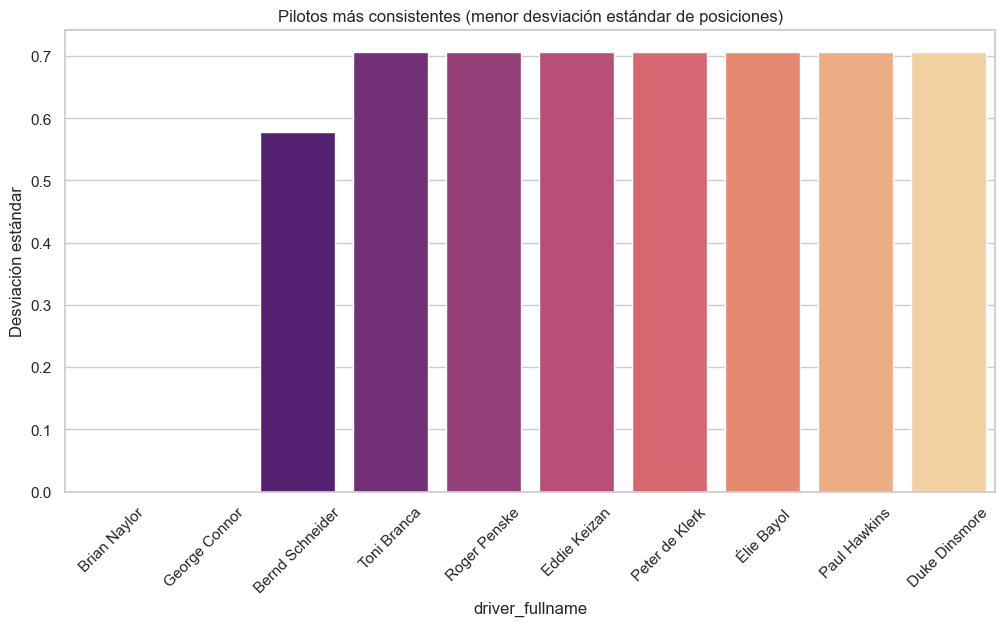

In [16]:
# Top 10 pilotos por puntos
plt.figure(figsize=(12,6))
sns.barplot(x=total_points.head(10).index, y=total_points.head(10).values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Top 10 pilotos por puntos")
plt.ylabel("Puntos")
plt.show()

# Consistencia de pilotos
plt.figure(figsize=(12,6))
sns.barplot(x=consistency.head(10).index, y=consistency.head(10).values, palette='magma')
plt.xticks(rotation=45)
plt.title("Pilotos más consistentes (menor desviación estándar de posiciones)")
plt.ylabel("Desviación estándar")
plt.show()


Enconsistencia de pilotos, la desviación estándar se usa para medir qué tan consistentes son los resultados de un piloto en sus posiciones de carrera.

Si un piloto termina siempre en posiciones similares (por ejemplo, siempre entre el 2º y 4º lugar), su desviación estándar será baja.

Si otro piloto tiene resultados muy variados (a veces 1º, otras veces 10º), su desviación estándar será alta.

Por eso, en este caso:

Menor desviación estándar → piloto más consistente.

Mayor desviación estándar → piloto más irregular.

En otras palabras, los pilotos que aparecen en tu gráfico con barras más bajas son los que mantienen posiciones similares a lo largo de la temporada.